In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
%matplotlib inline

# Load csv
df = pd.read_csv("df_sim.csv")
df.head()

,metric,m,n,k,metric_name,model,seq
0,0.411770,0,0,0,Semantic similarity,Episodic Model,0
1,0.418089,0,0,0,Semantic similarity,Episodic Model,1
2,0.490458,0,0,0,Semantic similarity,Episodic Model,2
3,0.464376,0,0,0,Semantic similarity,Episodic Model,3
4,0.497841,0,0,0,Semantic similarity,Episodic Model,4


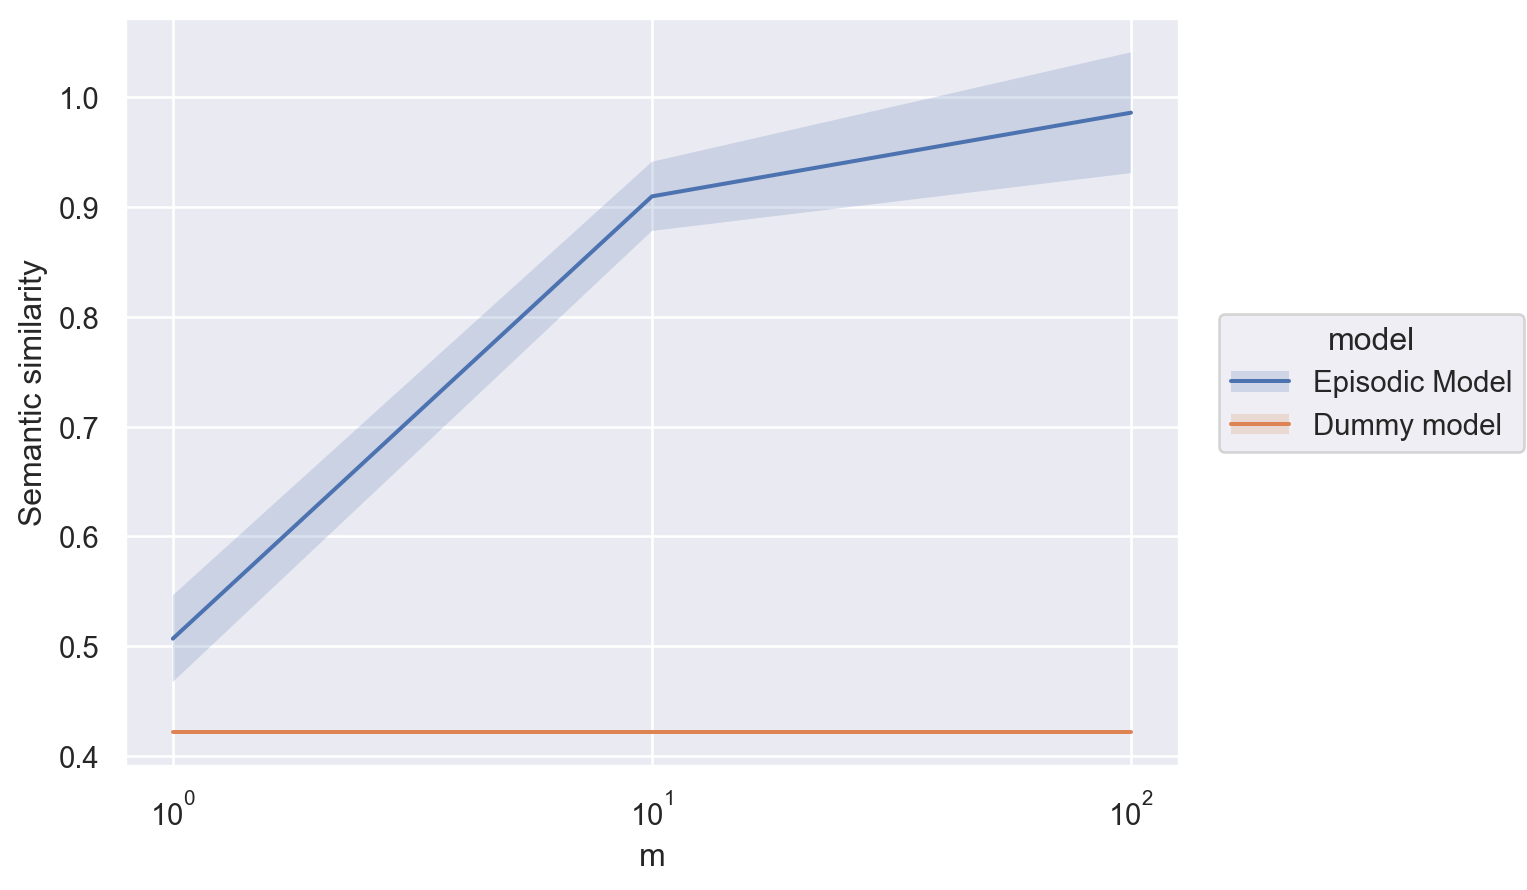

In [8]:
# Filter df using only Semantic similarity
df_plot = df.copy()
df_plot = df_plot[df_plot['metric_name'] == 'Semantic similarity']

# Filter k and n to 1


p = (
    so.Plot(df_plot, x='m', y='metric', color='model', group='model')
    .pair([])
    .add(so.Band(), so.Est(errorbar="sd"))
    .add(so.Line(), so.Agg())
    .scale(x='log')
    .label(x='m', y='Semantic similarity')

    )
p

n
m
k
n
m
k
n
m
k


[]

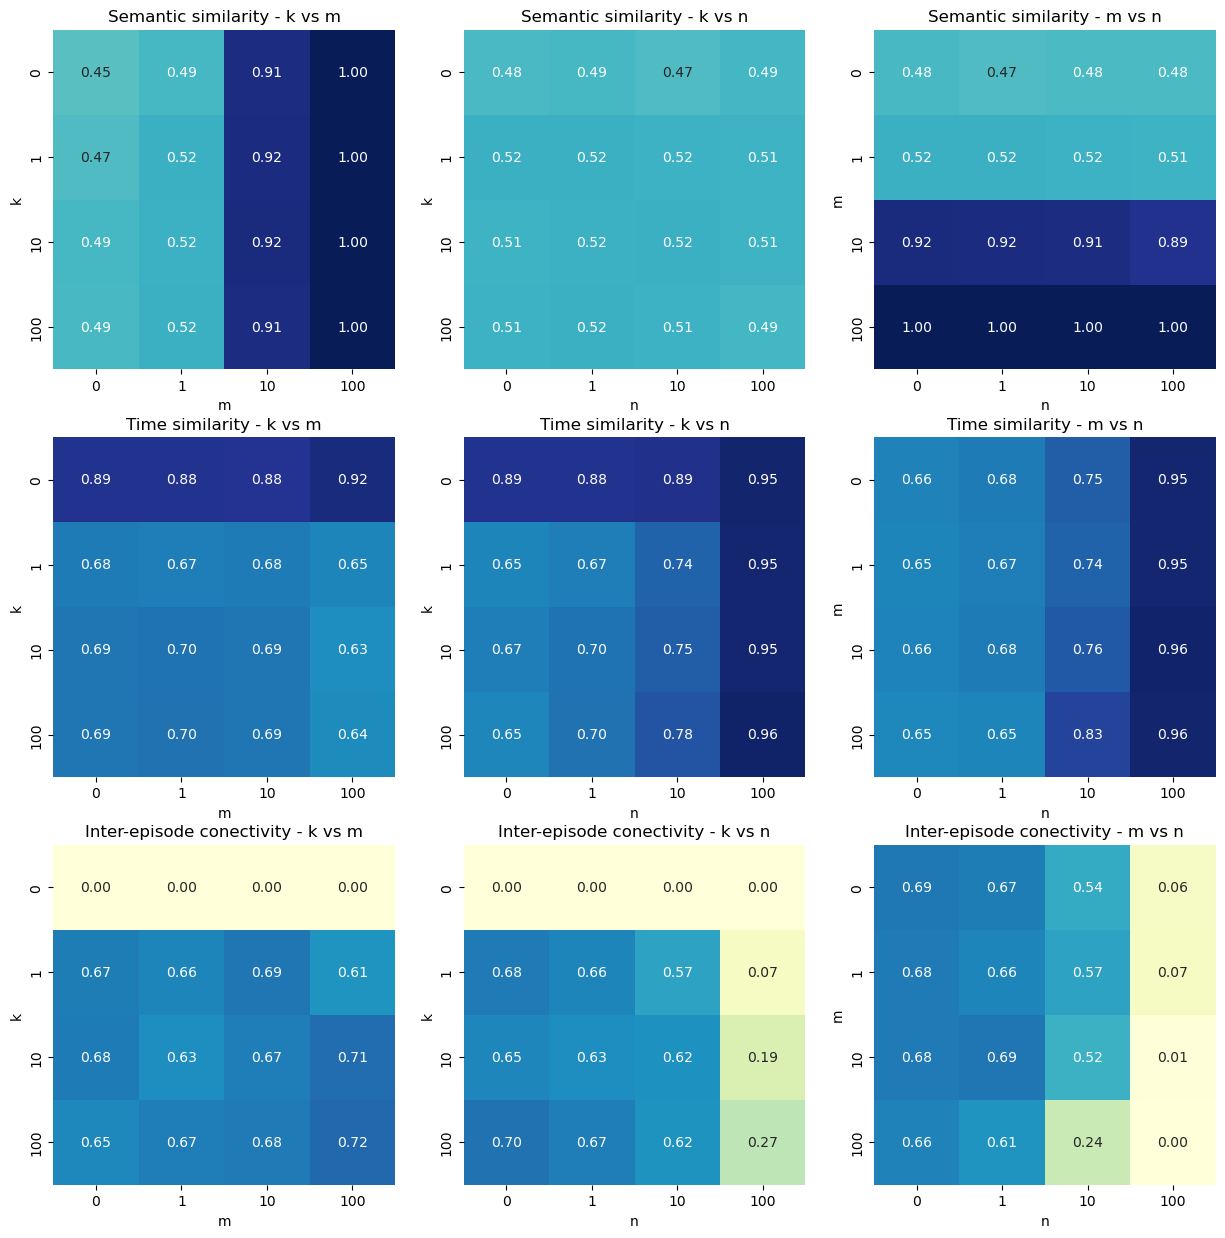

In [5]:
# Create a heatmap of the data

import itertools



fig, ax = plt.subplots(3, 3, figsize=(15, 15))

axs = ax.flatten()

parameters = ["k", "m", "n"]
for j, m_n in enumerate(df["metric_name"].unique()):
    for i, (p1, p2) in enumerate(itertools.combinations(parameters, 2)):
        p3 = list(set(parameters) - set([p1, p2]))[0]
        print(p3)
        df_plot = df.copy()
        df_plot = df_plot[df_plot['metric_name'] == m_n]
        df_plot = df_plot[df_plot[p3] == 1]

        df_plot = df_plot[df_plot['model'] == 'Episodic Model']

        df_plot = df_plot.pivot_table(index=p1, columns=p2, values='metric', aggfunc=np.mean)
        df_plot

        # Plot heatmap
        sns.heatmap(df_plot, annot=True, fmt=".2f", cmap="YlGnBu", cbar=False, ax=axs[j * 3 + i], vmin=0, vmax=1)
        axs[j*3 +i].set_title(f"{m_n} - {p1} vs {p2}")

plt.plot()